In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
h1b = pd.read_csv("h1b.csv")
h1b

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


#### We can see that there are missing values in the dataset

In [10]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


## Data Cleansing

In [8]:
print(h1b.isnull().sum())

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64


In [11]:
h1b.fillna(0, inplace=True)
h1b.replace({"Y":1, "N":0}, inplace=True)
h1b.drop_duplicates(inplace=True)

## Analysis of the Dataset

### 1. Petition distributed by case statuses

In [15]:
h1b["CASE_STATUS"].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
0                                                          13
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

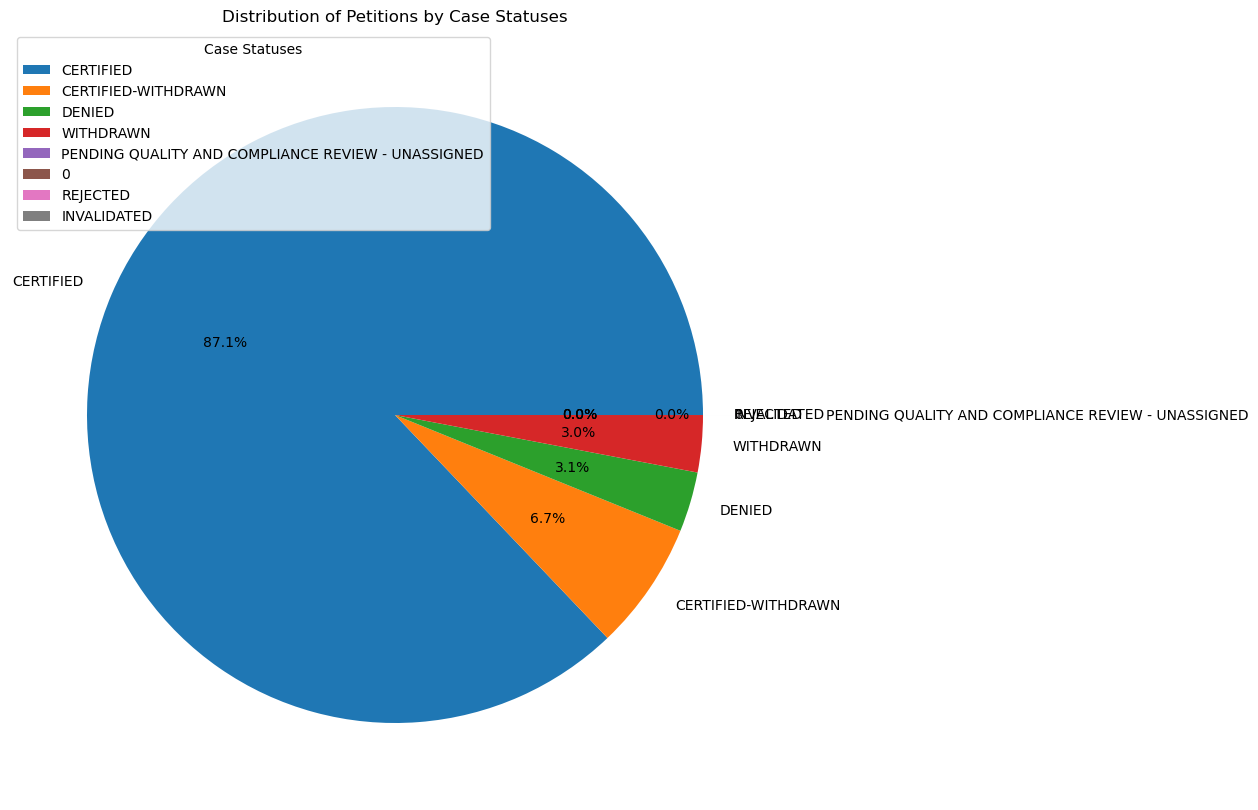

In [23]:
plt.figure(figsize=(12, 10))
plt.pie(h1b["CASE_STATUS"].value_counts(), labels=h1b["CASE_STATUS"].value_counts().index, autopct='%1.1f%%',
       explode=[0,0,0,0,0.3,0,0,0])
plt.title("Distribution of Petitions by Case Statuses")
plt.legend(title="Case Statuses", loc="best")
plt.show()

### 2. Top employers filing the petitions

In [34]:
h1b['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      130592
TATA CONSULTANCY SERVICES LIMITED     64726
WIPRO LIMITED                         48117
DELOITTE CONSULTING LLP               36742
IBM INDIA PRIVATE LIMITED             34219
                                      ...  
HARBORTOUCH PAYMENTS, LLC                 1
RESULTLY LLC                              1
AMERICAN POWDER COATING                   1
WEST FLORIDA MEDICAL ASSOCIATES           1
J. LOGAN INTERIORS                        1
Name: EMPLOYER_NAME, Length: 236014, dtype: int64

### 3. Top 15 companies that filed the most visa application

In [35]:
h1b['EMPLOYER_NAME'].value_counts().head(15)

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17457
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
Name: EMPLOYER_NAME, dtype: int64

### 4. Top employers granting maximum prevailing wages

In [37]:
h1b.sort_values(by="PREVAILING_WAGE",ascending=False)[['EMPLOYER_NAME','PREVAILING_WAGE']].head(10).reset_index()

,index,EMPLOYER_NAME,PREVAILING_WAGE
0,2163248,"GUARDIAN HEALTHCARE PROVIDERS, INC.",6.997607e+09
1,2797982,"SCIVANTAGE, INC.",1.007814e+09
2,1673867,DISCOVER PRODUCTS INC.,8.201323e+08
3,1819718,"IDEXCEL, INC.",7.099999e+08
4,2775906,COMMONHEALTH ACTION,6.579000e+08
5,1547574,ARKRIT LLC,6.169317e+08
6,1668384,HOWARD HUGHES MEDICAL INSTITUTE,4.134726e+08
7,1805875,GOOGLE INC.,4.103154e+08
8,2796071,ICAP CORPORATES LLC,4.066379e+08
9,1698325,SAN LUIS VALLEY HEALTH,3.893760e+08


### 5. Top 20 states filing highest visa petitions

In [41]:
h1b['WORKSITE'].str.split(',').str[1].value_counts().head(20)

 CALIFORNIA        559942
 TEXAS             294455
 NEW YORK          291412
 NEW JERSEY        214078
 ILLINOIS          160814
 MASSACHUSETTS     116466
 PENNSYLVANIA      109960
 FLORIDA           105773
 GEORGIA           103168
 WASHINGTON        102801
 VIRGINIA           90028
 MICHIGAN           82964
 NORTH CAROLINA     79672
 OHIO               76575
 MARYLAND           56257
 CONNECTICUT        50253
 MINNESOTA          48686
 ARIZONA            42054
 MISSOURI           34813
 WISCONSIN          32672
Name: WORKSITE, dtype: int64

### 6. Petition distribution by year

In [42]:
h1b['YEAR'].value_counts()

2016.0    647803
2015.0    618727
2014.0    519427
2013.0    442114
2012.0    415607
2011.0    358767
0.0           13
Name: YEAR, dtype: int64

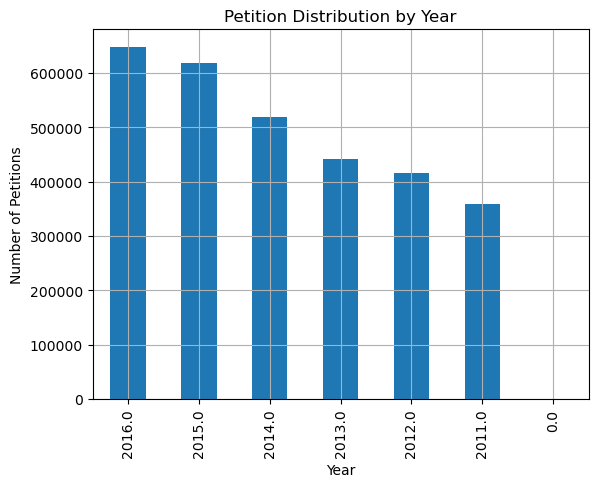

In [52]:
h1b['YEAR'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Petitions')
plt.title('Petition Distribution by Year')
plt.grid()
plt.show()

### 7. Number of visa petitions denied

In [54]:
denied = h1b['CASE_STATUS'].value_counts().loc['DENIED']
print("No. of visa petitions denied is: "+ str(denied))

No. of visa petitions denied is: 94346


### 8. Rate of visas denied from last 5 years

In [63]:
petition_distribution = h1b['YEAR'].value_counts().sort_index()
denied_petitions = h1b[h1b['CASE_STATUS'] == 'DENIED']
denied_petitions_by_year = denied_petitions['YEAR'].value_counts()
denial_rate_by_year = pd.DataFrame({
    'Total Petitions': h1b['YEAR'].value_counts(),
    'Denied Petitions': denied_petitions['YEAR'].value_counts(),
})
denial_rate_by_year['Rate of Denial(%)'] = (denial_rate_by_year['Denied Petitions'] / denial_rate_by_year['Total Petitions']) * 100
last_5_years = denial_rate_by_year.sort_index().tail(5)
print(last_5_years)

        Total Petitions  Denied Petitions  Rate of Denial(%)
2012.0           415607           21096.0           5.075949
2013.0           442114           12126.0           2.742732
2014.0           519427           11896.0           2.290216
2015.0           618727           10923.0           1.765399
2016.0           647803            9175.0           1.416326


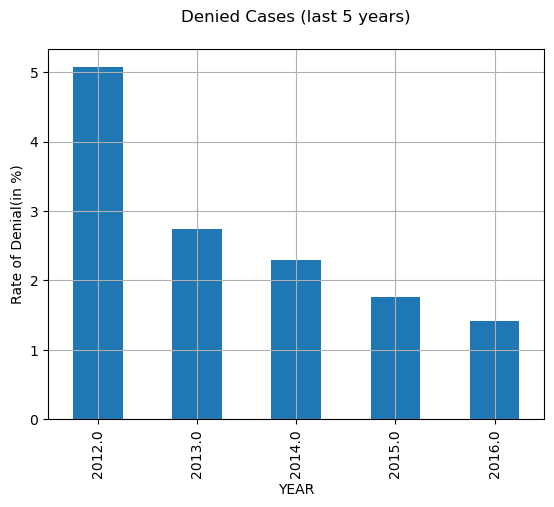

In [67]:
h=h1b[h1b['CASE_STATUS'] == 'DENIED'].groupby('YEAR').size()/(h1b.groupby('YEAR')['CASE_STATUS'].count())*100
h.iloc[-5:].plot(kind="bar")
plt.title("Denied Cases (last 5 years)",pad=20)
plt.ylabel("Rate of Denial(in %)")
plt.grid()
plt.show()

### 9. Number of visa petitions filed by states

In [68]:
h1b['WORKSITE'].str.split(',').str[1].value_counts()

 CALIFORNIA              559942
 TEXAS                   294455
 NEW YORK                291412
 NEW JERSEY              214078
 ILLINOIS                160814
 MASSACHUSETTS           116466
 PENNSYLVANIA            109960
 FLORIDA                 105773
 GEORGIA                 103168
 WASHINGTON              102801
 VIRGINIA                 90028
 MICHIGAN                 82964
 NORTH CAROLINA           79672
 OHIO                     76575
 MARYLAND                 56257
 CONNECTICUT              50253
 MINNESOTA                48686
 ARIZONA                  42054
 MISSOURI                 34813
 WISCONSIN                32672
 COLORADO                 32038
 INDIANA                  30516
 TENNESSEE                27673
 OREGON                   23790
 DISTRICT OF COLUMBIA     22708
 DELAWARE                 18138
 IOWA                     16743
 ARKANSAS                 14762
 KANSAS                   13782
 UTAH                     13107
 SOUTH CAROLINA           12932
 KENTUCK

### 10. Rate of denial of visa petition by the states

In [69]:
denied = h1b[h1b["CASE_STATUS"]=="DENIED"]
rate_denied_state = denied.groupby("State")[["CASE_STATUS"]].count()
def total_cases_per_year(h1b, denied):
    h1b.groupby("State")["CASE_STATUS"].count()
    denied.insert(1,'Total_Cases', h1b.groupby("State")["CASE_STATUS"].count())
    return denied
total_cases_per_year(h1b, rate_denied_state)
rate_denied_state["RATE"] = (rate_denied_state["CASE_STATUS"] / rate_denied_state["Total_Cases"])*100
rate_denied_state[["RATE"]]

,RATE
State,
ALABAMA,5.091193
ALASKA,11.318052
ARIZONA,2.751225
ARKANSAS,2.255792
CALIFORNIA,3.168185
COLORADO,3.567638
CONNECTICUT,2.459555
DELAWARE,2.023376
DISTRICT OF COLUMBIA,5.205214


<Figure size 640x480 with 0 Axes>

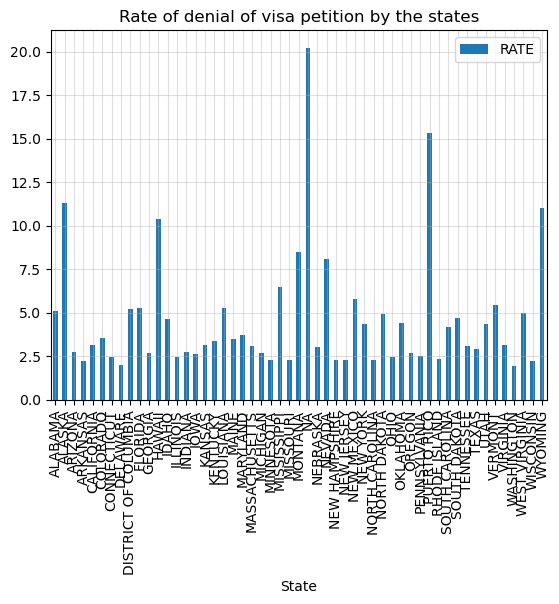

In [88]:
plt.figure().set_figwidth=(1)
rate_denied_state[["RATE"]].plot(kind="bar")
plt.title("Rate of denial of visa petition by the states")
plt.grid(alpha=0.4)
plt.show()

### 11. Top 25 job titles

In [89]:
h1b[["JOB_TITLE"]].value_counts().head(25)

JOB_TITLE                  
PROGRAMMER ANALYST             249038
SOFTWARE ENGINEER              121307
COMPUTER PROGRAMMER             70570
SYSTEMS ANALYST                 61965
SOFTWARE DEVELOPER              42907
BUSINESS ANALYST                39681
COMPUTER SYSTEMS ANALYST        35086
TECHNOLOGY LEAD - US            28350
SENIOR SOFTWARE ENGINEER        27133
TECHNOLOGY ANALYST - US         26055
ASSISTANT PROFESSOR             25265
SENIOR CONSULTANT               24904
CONSULTANT                      23081
PHYSICAL THERAPIST              20207
PROJECT MANAGER                 20172
DATABASE ADMINISTRATOR          16665
ACCOUNTANT                      14048
COMPUTER PROGRAMMER ANALYST     13634
RESEARCH ASSOCIATE              13623
DEVELOPER                       12909
ASSOCIATE                       12502
ANALYST                         11751
LEAD ENGINEER                   11157
COMPUTER SYSTEMS ENGINEER       11090
SENIOR SOFTWARE DEVELOPER       10208
dtype: int64

### 12. Top 10 occupations with the highest wages

In [92]:
h1b.sort_values('PREVAILING_WAGE',ascending=False)[['JOB_TITLE','PREVAILING_WAGE']].head(10).reset_index()

,index,JOB_TITLE,PREVAILING_WAGE
0,2163248,PHYSICAL THERAPISTS,6.997607e+09
1,2797982,SOFTWARE DEVELOPER,1.007814e+09
2,1673867,PROJECT MANAGER,8.201323e+08
3,1819718,.NET DEVELOPER,7.099999e+08
4,2775906,PROGRAM MANAGER (POSITIVE PATHWAYS),6.579000e+08
5,1547574,PROGRAMMER/ANALYST,6.169317e+08
6,1668384,RESEARCH ASSOCIATE,4.134726e+08
7,1805875,"MANAGER, SOFTWARE ENGINEERING",4.103154e+08
8,2796071,"MANAGING DIRECTOR, EQUITY DERIVATIVES",4.066379e+08
9,1698325,INTERNIST,3.893760e+08


### 13. To analyse the fraction of full-time and part-time workers

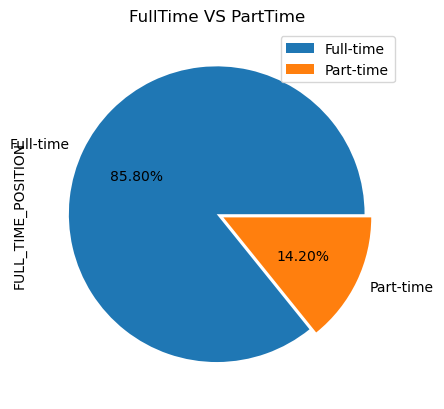

In [96]:
h1b["FULL_TIME_POSITION"].value_counts().plot(kind="pie", autopct="%0.2f%%", explode=[0,0.05], labels=["Full-time","Part-time"], title="FullTime VS PartTime")
plt.legend()
plt.show()